In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Generate the dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(1000, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(1000)




In [10]:
print("Data shape:", X.shape)
print("Target shape:", y.shape)

Data shape: (1000, 1)
Target shape: (1000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [30]:
y_pred = regressor.predict(X_test)

# Accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.04331267812757272
R^2 Score: 0.9184825169669435


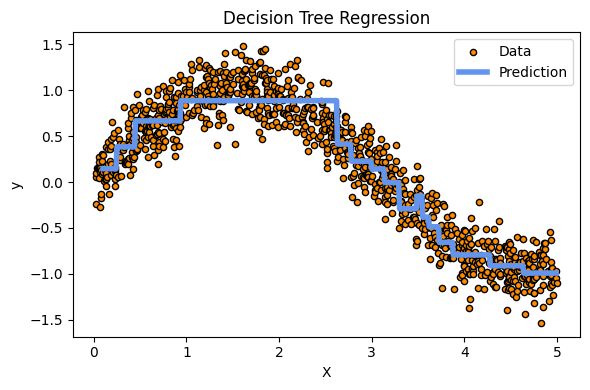

In [32]:
X_grid = np.arange(0.1, 5.0, 0.01)[:, np.newaxis]
y_grid_pred = regressor.predict(X_grid)

plt.figure(figsize=(6,4 ))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Data")
plt.plot(X_grid, y_grid_pred, color="cornflowerblue", linewidth=4, label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.tight_layout()
plt.show()

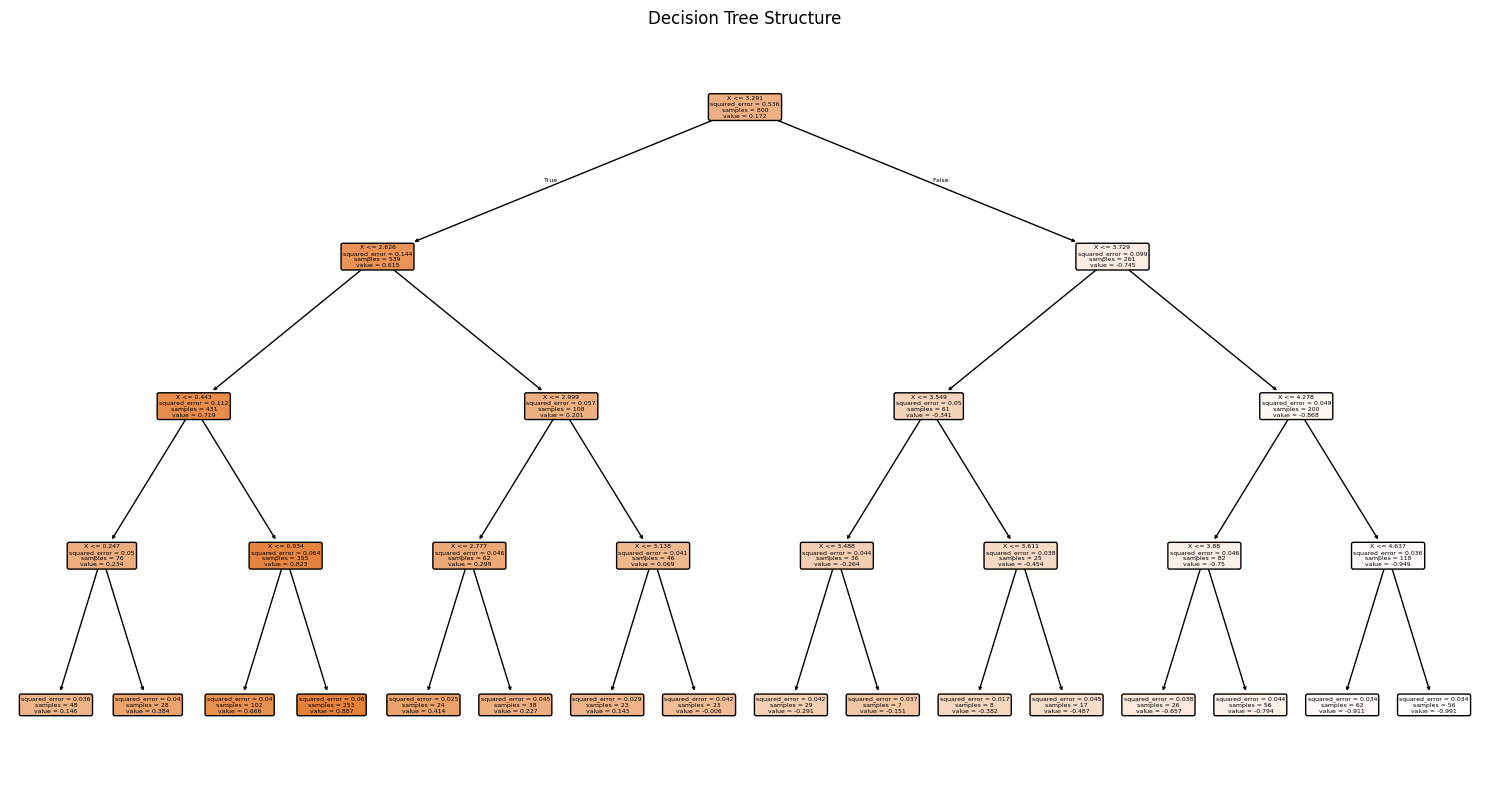

In [17]:
# Plot the decision tree
plt.figure(figsize=(15, 8))
plot_tree(regressor, filled=True, feature_names=["X"], rounded=True)
plt.title("Decision Tree Structure")
plt.tight_layout()
plt.show()


C:\Users\manan\AppData\Local\Temp\ipykernel_1548\2818111334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


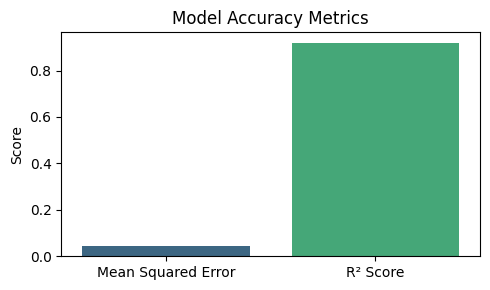

{'Mean Squared Error': 0.04331267812757272, 'R² Score': 0.9184825169669435}

In [19]:
# Bar chart of accuracy metrics
metrics = {"Mean Squared Error": mse, "R² Score": r2}
plt.figure(figsize=(5, 3))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Model Accuracy Metrics")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

metrics  # Display raw metric values as well


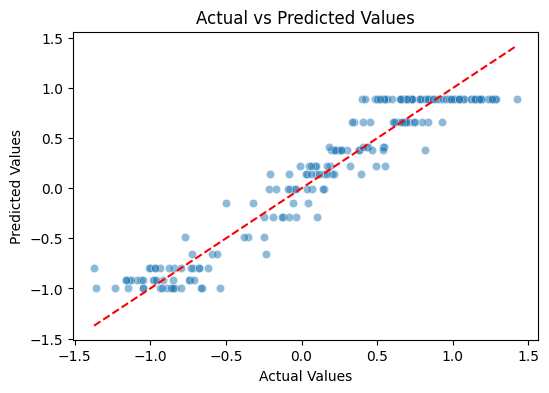

In [33]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()

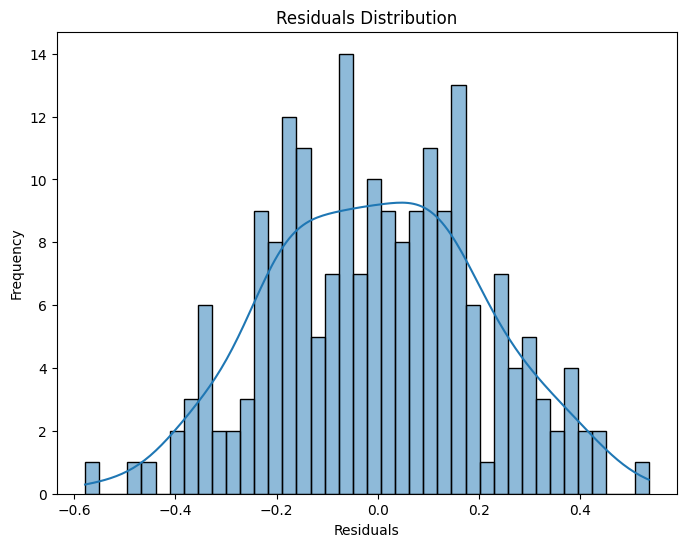

In [21]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=40)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
